## 2.4 Fundamentals of Python Visualizations Part 2

### Content

#### 1. Import Libraries and Data

#### 2. Create a bar chart of the top 20 starting stations frequencies

#### 3. Recreate the dual-axis line plot from the previous Exercise using seaborn.

#### 4. Box Plots: Categorical Value (Member vs. Casual Riders)

#### 5. Playing with Facet Grids and Insights

### 1. Import Libraries and Data

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('dark')

In [3]:
df = pd.read_csv('data/nyc_data.csv', index_col = 0)

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'end_time', 'avgTemp', '_merge'],
      dtype='object')

### 2. 20 most popular starting stations

In [5]:
df['value'] = 1

In [6]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [7]:
top20 = df_t.nlargest(20, 'value')

In [8]:
top20

,start_station_name,value
37,Grove St PATH,42556
75,South Waterfront Walkway - Sinatra Dr & 1 St,34245
44,Hoboken Terminal - River St & Hudson Pl,33020
43,Hoboken Terminal - Hudson St & Hudson Pl,30244
22,City Hall - Washington St & 1 St,23289
69,Newport Pkwy,21961
38,Hamilton Park,20477
68,Newport PATH,19965
42,Hoboken Ave at Monmouth St,19501
61,Marin Light Rail,19230


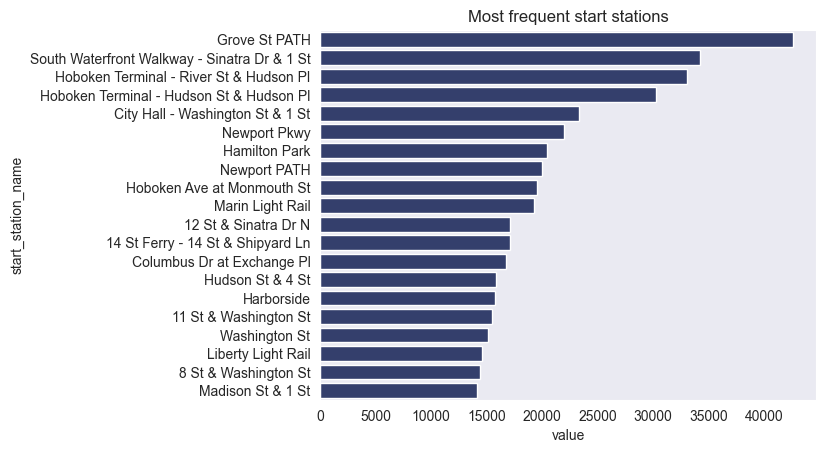

In [9]:
#crest color palette
sns.set_palette('crest_r', n_colors = 20)
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

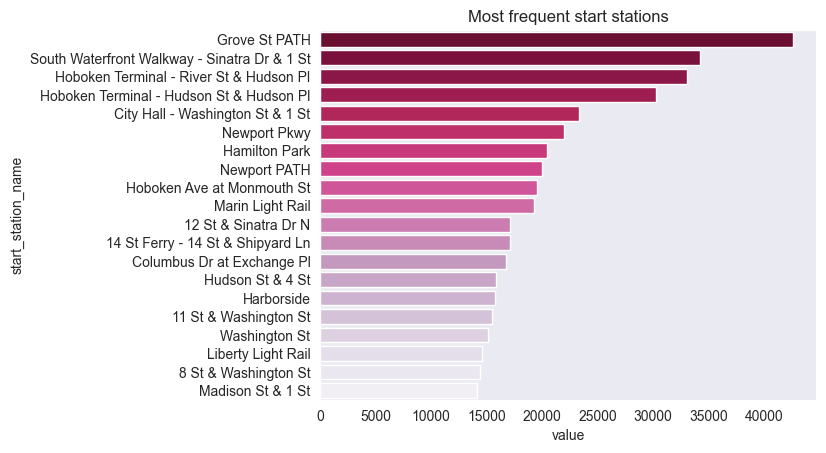

In [12]:
#assigning color palette

sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("PuRd_r")) 
plt.title("Most frequent start stations")
plt.show()

#### I'm not sure which color I prefer

### 3. Line Plot: Temperatures and Bike Rides

In [13]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [14]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'end_time', 'avgTemp', '_merge',
       'value'],
      dtype='object')

In [15]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [16]:
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [17]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '202-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          895485
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (592, 21)
Shape of January 2nd is (0, 21)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')


In [18]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

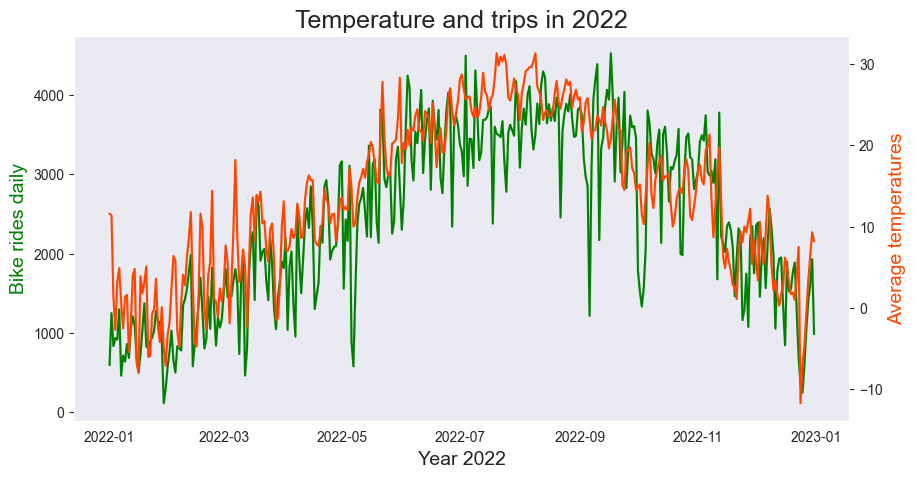

In [19]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "green")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "green", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="orangered", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "orangered",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### 4. Box Plots: Categorical Value (Member vs. Casual Riders)

In [20]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_time                    object
date                  datetime64[ns]
end_time                      object
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily               int64
merge_flag                  category
dtype: object

In [21]:
df['member_casual']

0         member
1         member
2         member
3         casual
4         member
           ...  
895480    casual
895481    casual
895482    casual
895483    casual
895484    member
Name: member_casual, Length: 895485, dtype: object

In [22]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,start_time,date,end_time,avgTemp,_merge,value,bike_rides_daily,merge_flag
0,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,...,-74.036486,member,2022-01-01 09:21:14,2022-01-01,2022-01-01 09:35:46,11.6,both,1,592,both
1,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,...,-74.024020,member,2022-01-01 02:43:56,2022-01-01,2022-01-01 02:43:57,11.6,both,1,592,both
2,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,...,-74.035483,member,2022-01-01 02:13:33,2022-01-01,2022-01-01 02:18:42,11.6,both,1,592,both
3,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,...,-73.993915,casual,2022-01-01 17:18:46,2022-01-01,2022-01-01 18:55:25,11.6,both,1,592,both
4,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,...,-74.030305,member,2022-01-01 11:23:32,2022-01-01,2022-01-01 11:29:27,11.6,both,1,592,both


### Creating "trip_druation"

In [23]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [24]:
# Extract only the time part
df['start_time_only'] = df['started_at'].dt.time

### Member/Casual and Temperature

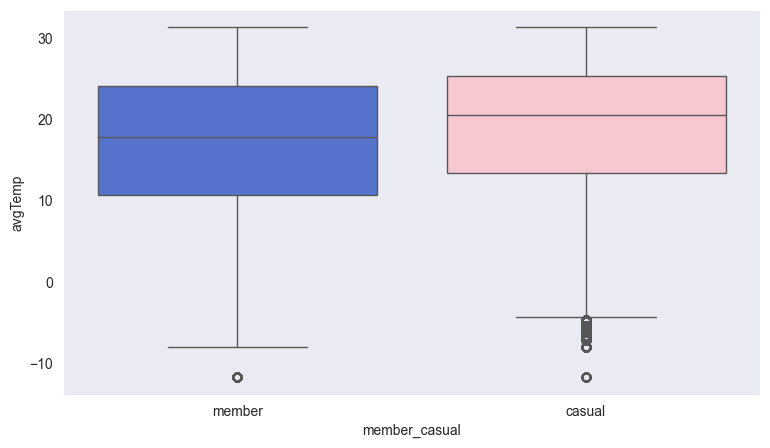

In [25]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'avgTemp', data = df, palette = {'member': 'royalblue', 'casual': 'pink'})
plt.show()

#### Insights
Members were more sligtly more likely to use the citi bike share during colder temperatures.

### Member/Casual and Trip Duration

In [26]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [27]:
df['trip_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

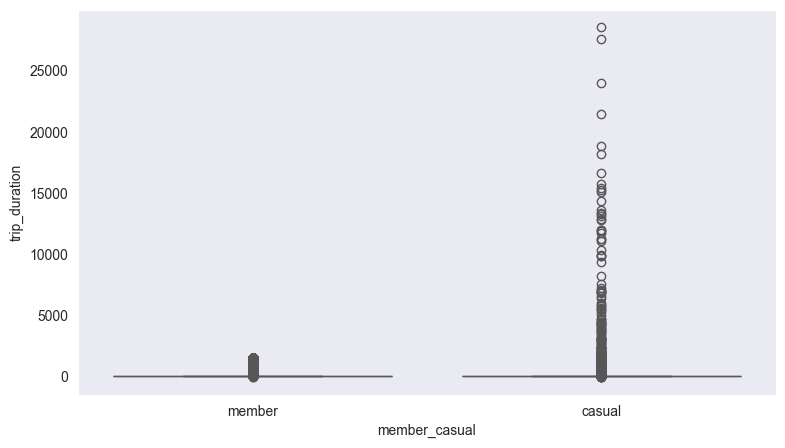

In [28]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'trip_duration', data = df, palette = {'member': 'royalblue', 'casual': 'pink'})
plt.show()

In [29]:
#Removing Outliers
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
df_filtered = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]

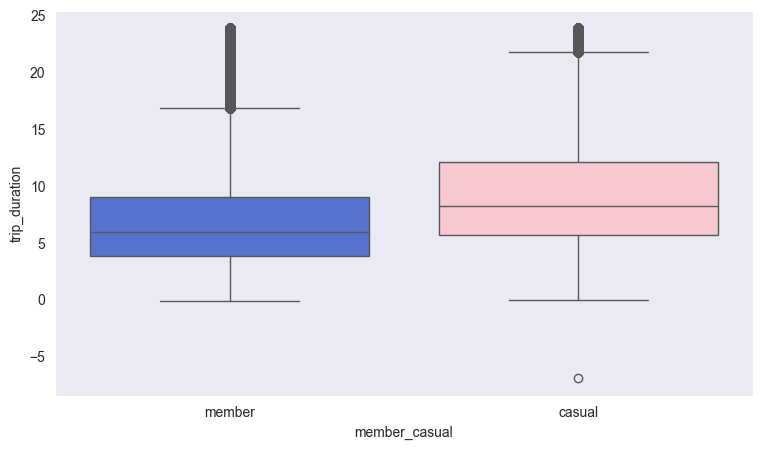

In [32]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'trip_duration', data = df_filtered, palette = {'member': 'royalblue', 'casual': 'pink'})
plt.show()

#### Insights
Casual users averaged longer trip durations than members. Why is this? One hypothesis is that members regularly bike to work or other regular engagements whereas for casual members, biking may be an actual activity? This is just a total guess at the moment but potentially something to research.

### 5. Facetgrids

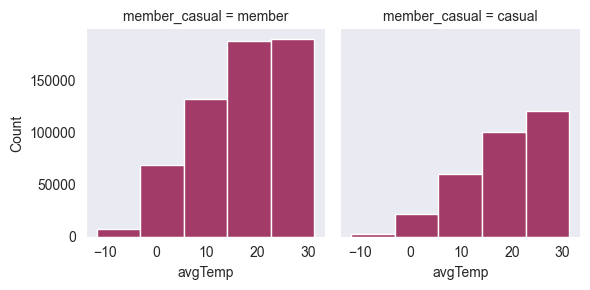

In [33]:
sns.set_palette('PuRd_r', n_colors = 10)
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "avgTemp", bins =(5))
plt.show()

#### Insights
There are more members using citi bikes than casual members. Both groups had higher numbers of people using the bike share during warmer temperatures.

### Trip Duration

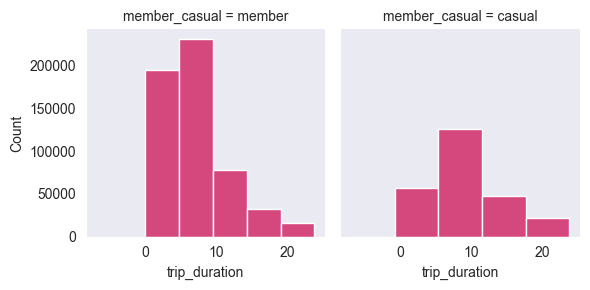

In [34]:
sns.set_palette('PuRd_r', n_colors = 3)
grid = sns.FacetGrid(df_filtered, col = "member_casual")
grid.map(sns.histplot, "trip_duration", bins =(5))
plt.show()

#### Insights
Both casual users and members had the highest frequency of trips lasting between 5-10 minutes. Casual users had nearly the same number of trips between 0-5 minutes and 10-15 minutes, while members had far more 0-5 minute trips than 10-15 minute trips. Overall, there are far more members using the bike share than casual users.